In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
#reading the csv
dataset = pd.read_csv('hiring.csv')

In [3]:
#filling the null values
dataset['experience'].fillna(0, inplace=True)

In [4]:
dataset['test_score'].fillna(dataset['test_score'].mean(), inplace=True)

In [5]:
#features
X = dataset.iloc[:, :3]

In [6]:
#Converting words to integer values
def convert_to_int(word):
    word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
                'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0: 0}
    return word_dict[word]

X['experience'] = X['experience'].apply(lambda x : convert_to_int(x))

In [7]:
#target
y = dataset.iloc[:, -1]

In [8]:
#Splitting Training and Test Set
#Since we have a very small dataset, we will train our model with all availabe data.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [9]:
#Fitting model with trainig data
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#Predicting the test data
y_pred=regressor.predict(X)

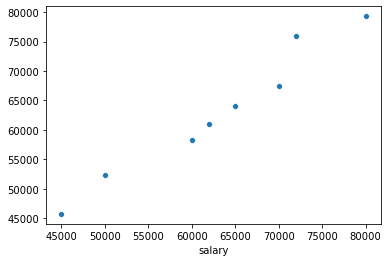

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# To check the quality of our model, let's plot it
sns.scatterplot(y,y_pred)
plt.show()

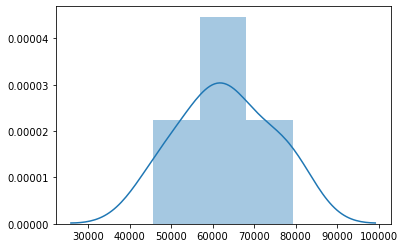

In [15]:
sns.distplot(y_pred)

In [17]:
from sklearn import metrics
import numpy as np

print('MAE :', metrics.mean_absolute_error(y,y_pred))
print('MSE :', metrics.mean_squared_error(y,y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y,y_pred)))

MAE : 1739.7560385573825
MSE : 4167481.961463813
RMSE : 2041.441148175429


In [18]:
# Serealizing the model
file= open('model.pkl','wb')
pickle.dump(regressor,file)